# Сбор и разметка данных (семинары)
## Урок 8. Работа с данными
1. Скачайте датасет House Prices Kaggle со страницы конкурса (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.
2. Загрузите датасет в pandas DataFrame под названием df.


3. Выполните предварительную обработку данных, выполнив следующие шаги:
   
   **a**. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями).
   
   **b**. Проверьте и обработайте любые дублирующиеся строки в датасете. c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).


4. Проведите разведочный анализ данных (EDA), ответив на следующие вопросы: 
   
   **a**. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? 

   **b**. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? 

   **c**. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. 

   **d**. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.


5. Выполните проектирование признаков путем реализации следующих преобразований: 
   **a**. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. 
   **b**. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.


6. Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

In [178]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import  matplotlib
import seaborn as sns
from datetime import datetime

In [205]:
df = pd.read_csv('train.csv')

Исследуем датасет

In [206]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [182]:
df.shape

(1460, 81)

Ищем пропуски

In [183]:
df.isnull().sum()

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
 ... 
MoSold 0
YrSold 0
SaleType 0
SaleCondition 0
SalePrice 0
Length: 81, dtype: int64

Заменяем пропуски случайными значениями но с вероятностью заполнить наиболее часто встречающимися 

In [184]:
cont = df['MSZoning'].values
df['MSZoning'] = df['MSZoning'].fillna(np.random.choice(cont))
df['MSZoning'].isnull().sum()

0

Заменяем пропуски медианными значениями

In [185]:

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['LotFrontage'].isnull().sum()

0

Удаляем дубликаты, но видим что размер не изменился => дубликатов нет

In [187]:

df.drop_duplicates()
df.shape

(1460, 81)

Заменяем значения наличия центрального на 1 и 0

In [188]:

df['CentralAir'] = df['CentralAir'].replace('Y', 1)
df['CentralAir'] = df['CentralAir'].replace('N', 0)

Исследуеи значение стоймости жилья

In [189]:
df['SalePrice'].describe()

count 1460.000000
mean 180921.195890
std 79442.502883
min 34900.000000
25% 129975.000000
50% 163000.000000
75% 214000.000000
max 755000.000000
Name: SalePrice, dtype: float64

- Слишком большое стандартное отклонение
- Большая разница между минимальным значением и 25-м процентилем.
- Большая разница между максимальным значением и 75-м процентилем.

<Axes: ylabel='SalePrice'>

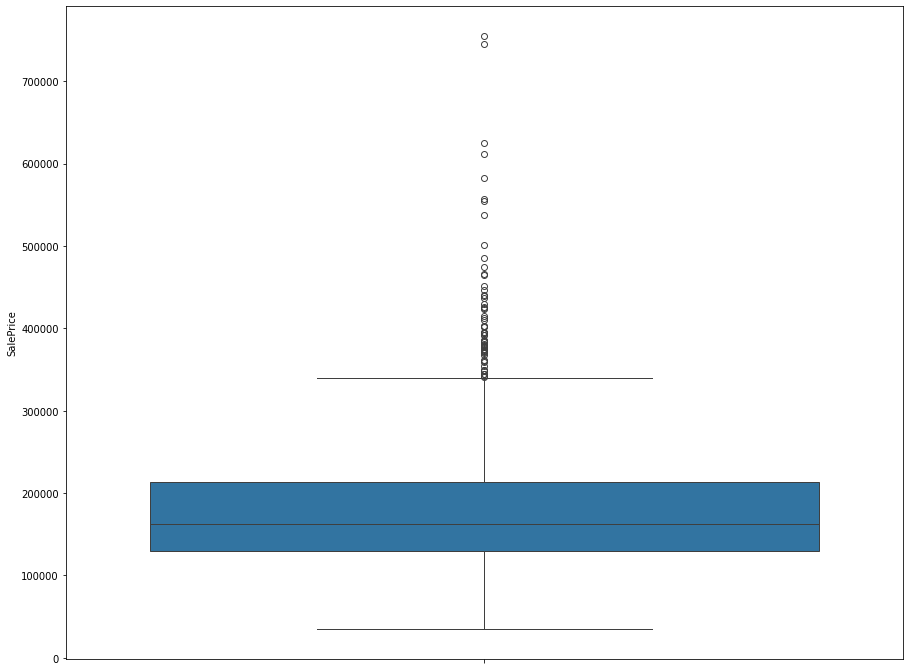

In [207]:

f, ax = plt.subplots(figsize=(15, 12))
sns.boxplot(df['SalePrice'])

видим большое количество выбросов

<Axes: xlabel='SalePrice', ylabel='Count'>

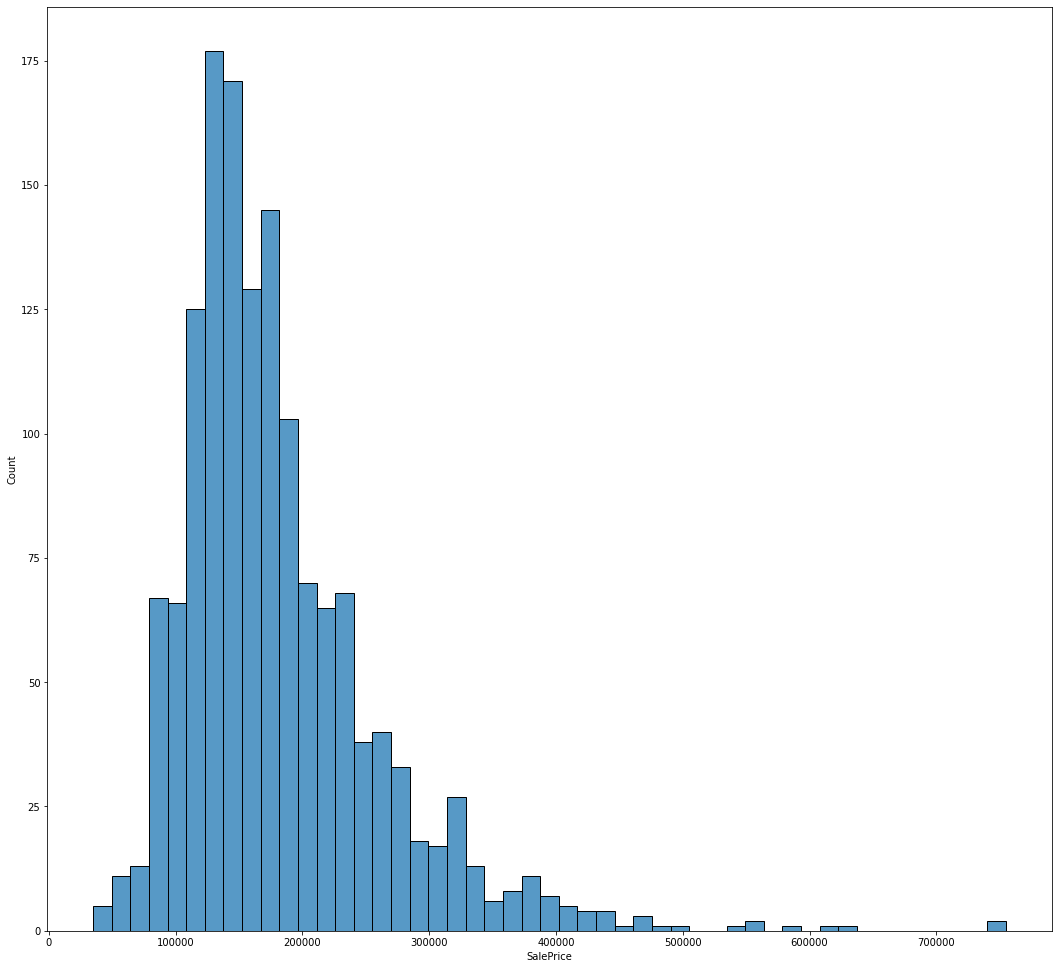

In [191]:
f, ax = plt.subplots(figsize=(18, 17))
sns.histplot(df['SalePrice'])

Посмотрим на корреляцию значений

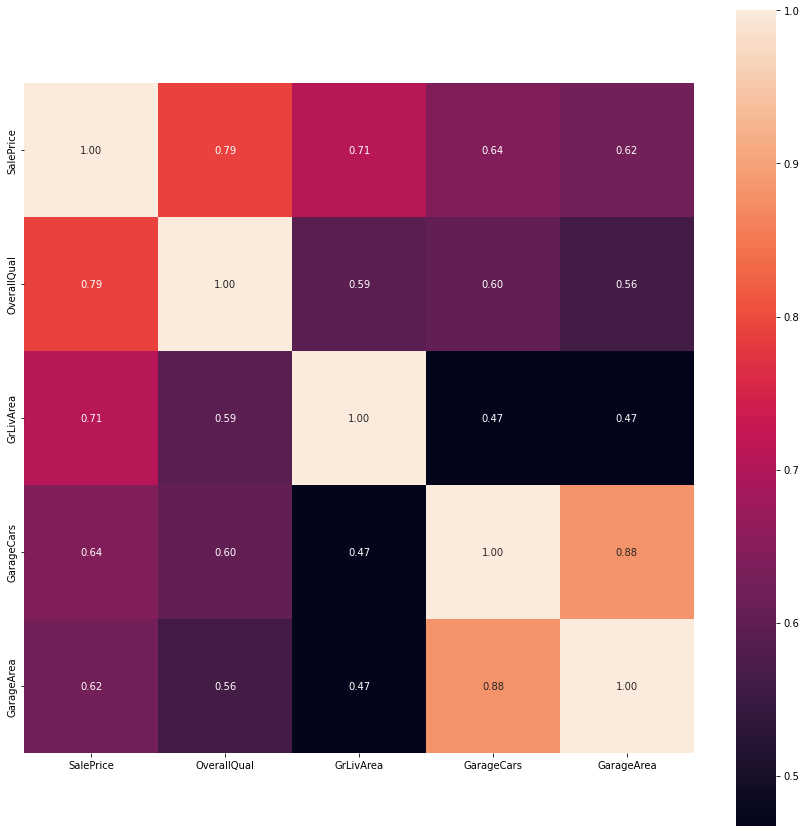

In [192]:
f, ax = plt.subplots(figsize=(15, 15))
k = 5
corr = df.corr(numeric_only=True)
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10},  yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Видим, что наибольшая корреляция с параметрами **GrLivArea** и **SalePrice**

Text(0.5, 0, 'GrLivArea')

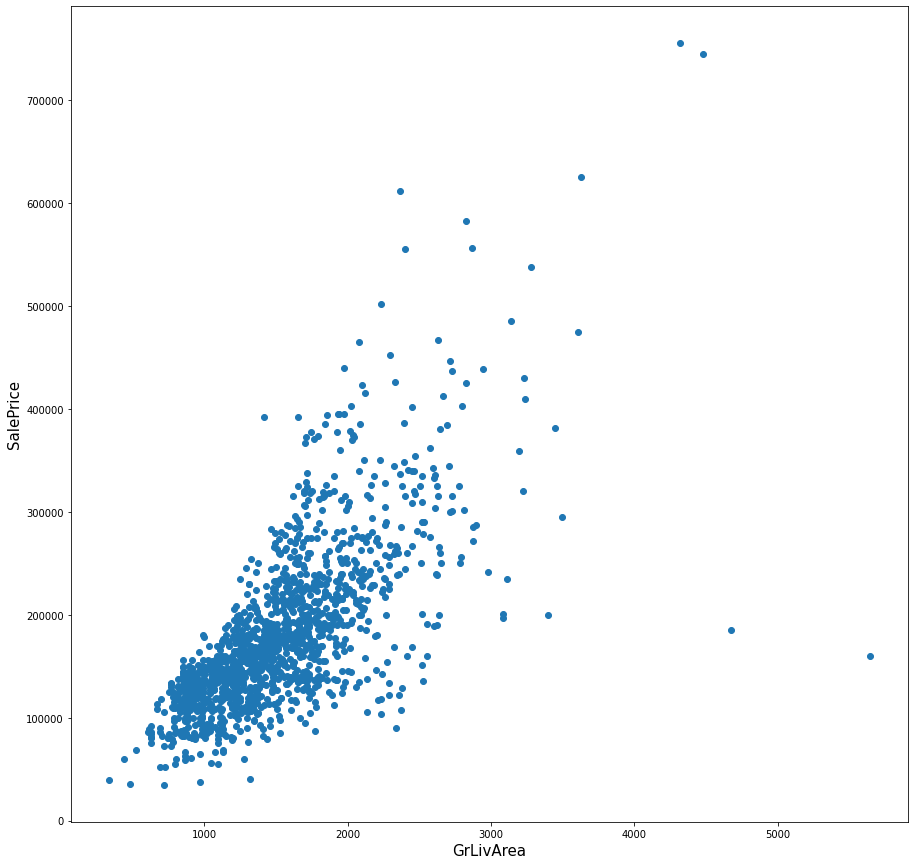

In [193]:
f, ax = plt.subplots(figsize=(15, 15))
plt.scatter(x = df['GrLivArea'], y=df['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)

Избавляемся от выбросов в GrLivArea

In [208]:
df = df.drop(df[df.GrLivArea > 4000].index)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Text(0.5, 0, 'GrLivArea')

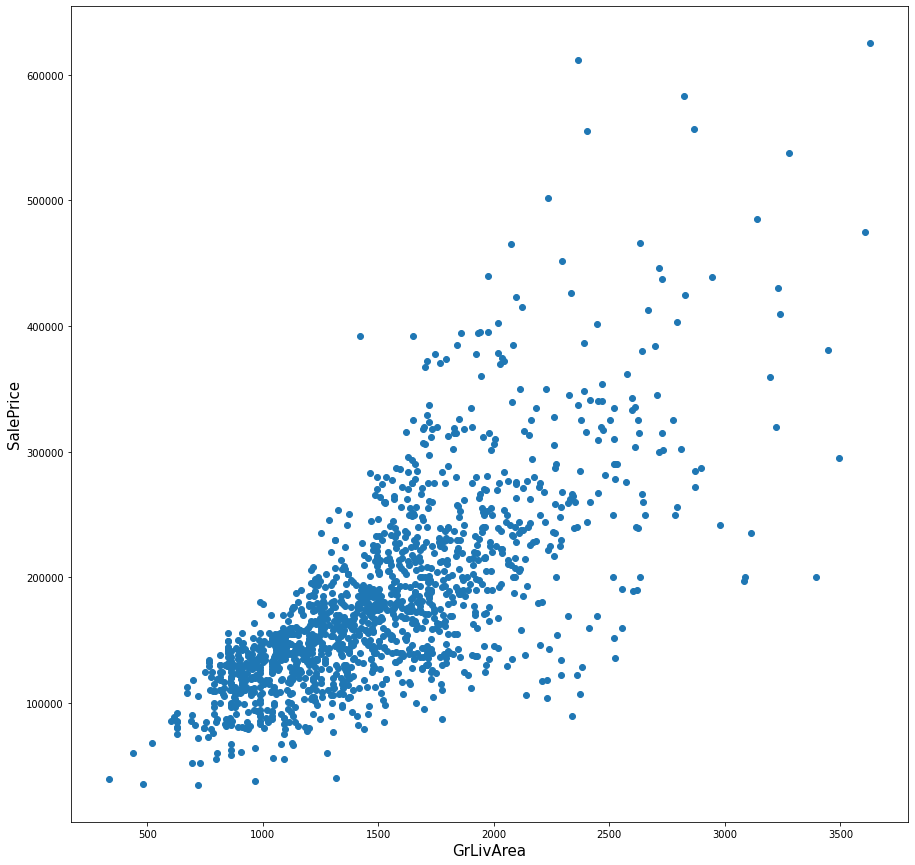

In [209]:
f, ax = plt.subplots(figsize=(15, 15))
plt.scatter(x = df['GrLivArea'], y=df['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)

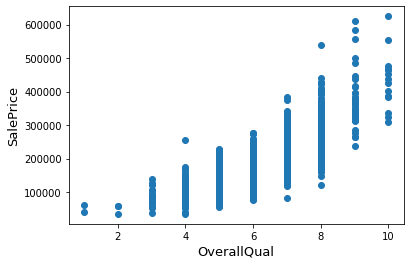

In [196]:
fig, ax = plt.subplots()
ax.scatter(x = df['OverallQual'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('OverallQual', fontsize=13)
plt.show()

Создаём новый столбец с возрастом дома

In [202]:
df['age_house'] = datetime.now().year - df.YearBuilt
df[['SalePrice', 'age_house']]

,SalePrice,age_house
0,208500,20
1,181500,47
2,223500,22
3,140000,108
4,250000,23
...,...,...
1455,175000,24
1456,210000,45
1457,266500,82
1458,142125,73


Text(0.5, 0, 'age_house')

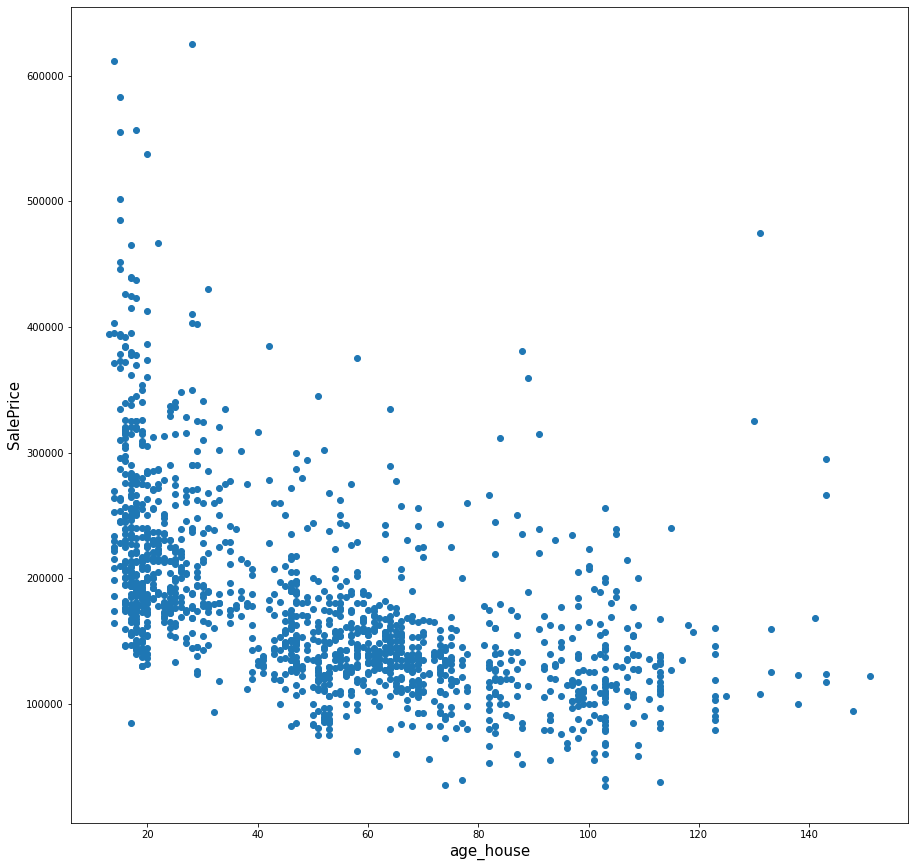

In [203]:
f, ax = plt.subplots(figsize=(15, 15))
plt.scatter(x = df['age_house'], y=df['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('age_house', fontsize=15)

Видим, что зависимости от возраста нет

In [210]:
df.to_csv('cleaned_house_prices.csv')